 # Step 1 --> We will collect the stock Data -- Apple 

In [2]:
pip install pandas_datareader

  Using cached pandas_datareader-0.10.0-py3-none-any.whl (109 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas_datareader as pdr

In [5]:
key = 'c3b2e425f9edc5b0ef91694bc40212c777ae3b57'

In [6]:
df = pdr.get_data_tiingo('AAPL',api_key = key)

C:\Users\Ajay\AppData\Local\Temp\ipykernel_5208\2567009958.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL',api_key = key)


In [7]:
df.to_csv('AAPL.csv')

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('AAPL.csv')

In [10]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-08-14 00:00:00+00:00,209.75,210.56,208.26,210.16,20748010,50.217473,50.411400,49.860744,50.315634,82992040,0.0,1.0
1,AAPL,2018-08-15 00:00:00+00:00,210.24,210.74,208.33,209.22,28807564,50.334787,50.454495,49.877503,50.090583,115230256,0.0,1.0
2,AAPL,2018-08-16 00:00:00+00:00,213.32,213.81,211.47,211.75,28500367,51.072188,51.189502,50.629269,50.696305,114001468,0.0,1.0
3,AAPL,2018-08-17 00:00:00+00:00,217.58,217.95,213.16,213.44,35426997,52.092099,52.180683,51.033881,51.100918,141707988,0.0,1.0
4,AAPL,2018-08-20 00:00:00+00:00,215.46,219.18,215.11,218.10,30287695,51.584538,52.475165,51.500742,52.216596,121150780,0.0,1.0


In [11]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2023-08-07 00:00:00+00:00,178.85,183.13,177.35,182.13,97576069,178.608895,182.883125,177.110917,181.884473,97576069,0.00,1.0
1253,AAPL,2023-08-08 00:00:00+00:00,179.80,180.27,177.58,179.69,67823003,179.557614,180.026980,177.340607,179.447762,67823003,0.00,1.0
1254,AAPL,2023-08-09 00:00:00+00:00,178.19,180.93,177.01,180.87,60378492,177.949784,180.686091,176.771375,180.626171,60378492,0.00,1.0
1255,AAPL,2023-08-10 00:00:00+00:00,177.97,180.75,177.60,179.48,54686851,177.730081,180.506333,177.360580,179.238045,54686851,0.00,1.0
1256,AAPL,2023-08-11 00:00:00+00:00,177.79,178.62,176.55,177.32,52036672,177.790000,178.620000,176.550000,177.320000,52036672,0.24,1.0


In [12]:
df1 = df.reset_index()['close']

In [13]:
df1.shape

(1257,)

In [14]:
df1

0       209.75
1       210.24
2       213.32
3       217.58
4       215.46
         ...  
1252    178.85
1253    179.80
1254    178.19
1255    177.97
1256    177.79
Name: close, Length: 1257, dtype: float64

Matplotlib is building the font cache; this may take a moment.


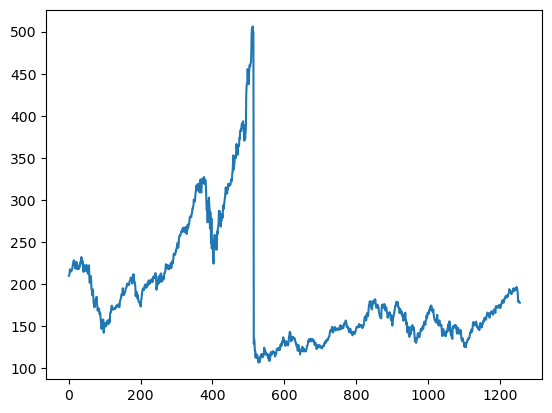

In [15]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [16]:
import numpy as np

## LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [18]:
df1

array([[0.2577583 ],
       [0.2589856 ],
       [0.26670006],
       ...,
       [0.17871008],
       [0.17815905],
       [0.1777082 ]])

# Preprocess the data - Train and Test

In [19]:
#splitting data into training data andd Test data
train_size = int(len(df1)*0.65)
test_size = len(df1) - train_size
train_data,test_data = df1[0:train_size,:],df1[train_size:len(df1),:1]

In [20]:
len(train_data),len(test_data)

(817, 440)

In [21]:
# convert an array of values into a dataset matrix
def create_dataset(dataset,time_step = 1):
    dataX,dataY = [],[]
    for i in range (len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i + time_step,0])
    return np.array(dataX),np.array(dataY)


In [22]:
# reshape into x = t,t+1,t+2,t+3 and t+4
time_step = 100
x_train,y_train = create_dataset(train_data,time_step)
x_test,y_test = create_dataset(test_data,time_step)

In [23]:
x_train

array([[0.2577583 , 0.2589856 , 0.26670006, ..., 0.08854101, 0.10374452,
        0.10291797],
       [0.2589856 , 0.26670006, 0.27737007, ..., 0.10374452, 0.10291797,
        0.10998121],
       [0.26670006, 0.27737007, 0.27206011, ..., 0.10291797, 0.10998121,
        0.11639324],
       ...,
       [0.05710708, 0.05838447, 0.06249217, ..., 0.10549781, 0.10815279,
        0.11183469],
       [0.05838447, 0.06249217, 0.05916093, ..., 0.10815279, 0.11183469,
        0.1105072 ],
       [0.06249217, 0.05916093, 0.06376957, ..., 0.11183469, 0.1105072 ,
        0.1113087 ]])

In [24]:
print(x_train.shape),print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [25]:
print(x_test.shape),print(y_test.shape)

(339, 100)
(339,)


(None, None)

In [26]:
# reshape input to be [sample ,time steps, features] which is required for LSTM
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)


# Create Stacked LSTM Model

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [30]:
model = Sequential()
model.add(LSTM(50,return_sequences = True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences = True,))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs= 100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 36s 710ms/step - loss: 0.0357 - val_loss: 0.0026
Epoch 2/100
12/12 [==============================] - 4s 329ms/step - loss: 0.0117 - val_loss: 3.9887e-04
Epoch 3/100
12/12 [==============================] - 4s 305ms/step - loss: 0.0107 - val_loss: 3.7812e-04
Epoch 4/100
12/12 [==============================] - 4s 304ms/step - loss: 0.0088 - val_loss: 4.0468e-04
Epoch 5/100
12/12 [==============================] - 4s 295ms/step - loss: 0.0076 - val_loss: 9.6856e-04
Epoch 6/100
12/12 [==============================] - 4s 321ms/step - loss: 0.0073 - val_loss: 5.4067e-04
Epoch 7/100
12/12 [==============================] - 4s 317ms/step - loss: 0.0062 - val_loss: 0.0011
Epoch 8/100
12/12 [==============================] - 4s 336ms/step - loss: 0.0058 - val_loss: 3.7258e-04
Epoch 9/100
12/12 [==============================] - 4s 325ms/step - loss: 0.0050 - val_loss: 4.5557e-04
Epoch 10/100
12/12 [==============================] - 4s 321ms

12/12 [==============================] - 3s 256ms/step - loss: 0.0011 - val_loss: 2.2122e-04
Epoch 79/100
12/12 [==============================] - 3s 254ms/step - loss: 9.9759e-04 - val_loss: 2.2032e-04
Epoch 80/100
12/12 [==============================] - 3s 255ms/step - loss: 9.6885e-04 - val_loss: 2.3158e-04
Epoch 81/100
12/12 [==============================] - 3s 253ms/step - loss: 9.9853e-04 - val_loss: 2.9859e-04
Epoch 82/100
12/12 [==============================] - 3s 256ms/step - loss: 0.0010 - val_loss: 2.2631e-04
Epoch 83/100
12/12 [==============================] - 3s 253ms/step - loss: 7.8990e-04 - val_loss: 2.2167e-04
Epoch 84/100
12/12 [==============================] - 3s 255ms/step - loss: 0.0013 - val_loss: 2.2588e-04
Epoch 85/100
12/12 [==============================] - 3s 255ms/step - loss: 0.0026 - val_loss: 3.1189e-04
Epoch 86/100
12/12 [==============================] - 3s 256ms/step - loss: 0.0021 - val_loss: 2.3185e-04
Epoch 87/100
12/12 [=======================

In [33]:
import tensorflow as tf

In [34]:
tf.__version__

'2.13.0'

# Lets do the prediction and check the performance matrix

In [38]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

11/11 [==============================] - 1s 113ms/step


In [39]:
# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [40]:
train_predict,test_predict

(array([[151.55856 ],
        [150.7354  ],
        [150.22615 ],
        [150.05667 ],
        [150.1069  ],
        [150.19612 ],
        [150.37381 ],
        [150.70453 ],
        [151.19844 ],
        [151.83981 ],
        [152.42285 ],
        [152.89146 ],
        [153.18333 ],
        [153.50621 ],
        [153.84718 ],
        [154.11514 ],
        [154.71005 ],
        [155.71387 ],
        [157.0238  ],
        [158.68025 ],
        [160.67624 ],
        [162.8576  ],
        [164.90465 ],
        [166.63683 ],
        [167.95013 ],
        [168.90964 ],
        [169.53783 ],
        [169.91002 ],
        [170.06749 ],
        [170.08066 ],
        [170.04573 ],
        [169.95857 ],
        [169.91533 ],
        [169.99168 ],
        [170.18626 ],
        [170.49013 ],
        [170.79092 ],
        [171.12607 ],
        [171.52632 ],
        [171.95833 ],
        [172.34442 ],
        [172.56735 ],
        [172.6376  ],
        [172.85263 ],
        [173.34738 ],
        [1

In [49]:
# Calculate the RMS (Root Mean Square) performace matrix
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

221.83050327024424

In [48]:
# Test data RMS
math.sqrt(mean_squared_error(y_test,test_predict))

157.1437340583212

In [51]:
import numpy

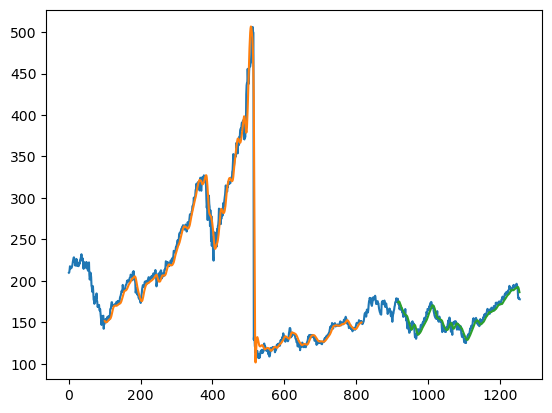

In [52]:
# Plotting 
# shift train prediction for plotting 
look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot [:, :] = np.nan
trainPredictPlot [look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting 
testPredictPlot = numpy.empty_like(df1)
testPredictPlot [:, :] = np.nan
testPredictPlot [len(train_predict)+(look_back*2)+1:len(df1)-1,:] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [53]:
len(test_data)

440

In [54]:
x_input = test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [55]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [56]:
temp_input

[0.13134627426424544,
 0.12771446462116465,
 0.13046963055729488,
 0.13377582968065116,
 0.12884157795867246,
 0.12726361928616153,
 0.13507827175954912,
 0.13906073888541015,
 0.1454226675015654,
 0.14860363180964303,
 0.14725109580463364,
 0.14256731371321218,
 0.14482154038822787,
 0.13823418910457103,
 0.13515341264871633,
 0.1334001252348152,
 0.14707576706324355,
 0.14619912335629304,
 0.14624921728240442,
 0.14935504070131495,
 0.15226048841577955,
 0.14980588603631806,
 0.14572323105823415,
 0.14649968691296178,
 0.14259236067626796,
 0.14256731371321218,
 0.15421415153412643,
 0.15739511584220411,
 0.15716969317470253,
 0.1545397620538509,
 0.15180964308077638,
 0.1476518472135253,
 0.16713838447088286,
 0.16696305572949277,
 0.16262993112085156,
 0.16710081402629928,
 0.16758922980588598,
 0.16463368816530988,
 0.1633813400125234,
 0.1633813400125234,
 0.16493425172197868,
 0.17084533500313087,
 0.17112085159674384,
 0.1687163431433938,
 0.16210394489668123,
 0.16280525986224

# Demonstrate prediction for next 30 days 

In [68]:
from numpy import array
lst_output = []
n_steps = 100
i = 0
while(i<30):
    
    
    if(len(temp_input)>100):
        x_input = np.array(temp_input[1:])
        print("{} day input {} ".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input, verbose = 0)
        print("{} day output {} ".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
        
    else:
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input,verbose = 0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1
              
                  
print(lst_output)              


0 day input [0.19829681 0.19556669 0.19579211 0.19316218 0.20077646 0.19997495
 0.19644333 0.20343143 0.20641202 0.20726362 0.21823419 0.2144521
 0.21162179 0.21282405 0.20999374 0.20480902 0.20348153 0.20771446
 0.20964308 0.21001879 0.21828428 0.21763306 0.2210645  0.21613024
 0.21314966 0.21517846 0.21735755 0.21956168 0.21635567 0.22289292
 0.22444584 0.22232937 0.21475266 0.21122104 0.18822793 0.18036318
 0.18274264 0.17871008 0.17815905 0.1777082  0.18784423 0.18343362
 0.1800455  0.17746213 0.1754559  0.17385109 0.17252783 0.17140794
 0.17043923 0.16958429 0.16881354 0.16810191 0.16742755 0.16677186
 0.16611941 0.16545831 0.16477995 0.1640791  0.16335335 0.16260272
 0.16182908 0.16103575 0.16022679 0.15940675 0.15858015 0.15775137
 0.15692416 0.15610178 0.15528689 0.15448138 0.15368664 0.15290335
 0.15213186 0.15137196 0.15062334 0.14988533 0.14915727 0.14843827
 0.14772758 0.14702447 0.14632823 0.1456382  0.14495398 0.14427511
 0.14360136 0.14293249 0.14226845 0.14160915 0.1409

7 day output [[0.12952341]] 
8 day input [0.20641202 0.20726362 0.21823419 0.2144521  0.21162179 0.21282405
 0.20999374 0.20480902 0.20348153 0.20771446 0.20964308 0.21001879
 0.21828428 0.21763306 0.2210645  0.21613024 0.21314966 0.21517846
 0.21735755 0.21956168 0.21635567 0.22289292 0.22444584 0.22232937
 0.21475266 0.21122104 0.18822793 0.18036318 0.18274264 0.17871008
 0.17815905 0.1777082  0.18784423 0.18343362 0.1800455  0.17746213
 0.1754559  0.17385109 0.17252783 0.17140794 0.17043923 0.16958429
 0.16881354 0.16810191 0.16742755 0.16677186 0.16611941 0.16545831
 0.16477995 0.1640791  0.16335335 0.16260272 0.16182908 0.16103575
 0.16022679 0.15940675 0.15858015 0.15775137 0.15692416 0.15610178
 0.15528689 0.15448138 0.15368664 0.15290335 0.15213186 0.15137196
 0.15062334 0.14988533 0.14915727 0.14843827 0.14772758 0.14702447
 0.14632823 0.1456382  0.14495398 0.14427511 0.14360136 0.14293249
 0.14226845 0.14160915 0.1409546  0.14030483 0.13966002 0.13902019
 0.13838547 0.1377560

15 day output [[0.12529689]] 
16 day input [0.20348153 0.20771446 0.20964308 0.21001879 0.21828428 0.21763306
 0.2210645  0.21613024 0.21314966 0.21517846 0.21735755 0.21956168
 0.21635567 0.22289292 0.22444584 0.22232937 0.21475266 0.21122104
 0.18822793 0.18036318 0.18274264 0.17871008 0.17815905 0.1777082
 0.18784423 0.18343362 0.1800455  0.17746213 0.1754559  0.17385109
 0.17252783 0.17140794 0.17043923 0.16958429 0.16881354 0.16810191
 0.16742755 0.16677186 0.16611941 0.16545831 0.16477995 0.1640791
 0.16335335 0.16260272 0.16182908 0.16103575 0.16022679 0.15940675
 0.15858015 0.15775137 0.15692416 0.15610178 0.15528689 0.15448138
 0.15368664 0.15290335 0.15213186 0.15137196 0.15062334 0.14988533
 0.14915727 0.14843827 0.14772758 0.14702447 0.14632823 0.1456382
 0.14495398 0.14427511 0.14360136 0.14293249 0.14226845 0.14160915
 0.1409546  0.14030483 0.13966002 0.13902019 0.13838547 0.13775602
 0.13713188 0.13651316 0.13589999 0.13529231 0.13469025 0.13409382
 0.133503   0.13291784

23 day output [[0.12139538]] 
24 day input [0.21314966 0.21517846 0.21735755 0.21956168 0.21635567 0.22289292
 0.22444584 0.22232937 0.21475266 0.21122104 0.18822793 0.18036318
 0.18274264 0.17871008 0.17815905 0.1777082  0.18784423 0.18343362
 0.1800455  0.17746213 0.1754559  0.17385109 0.17252783 0.17140794
 0.17043923 0.16958429 0.16881354 0.16810191 0.16742755 0.16677186
 0.16611941 0.16545831 0.16477995 0.1640791  0.16335335 0.16260272
 0.16182908 0.16103575 0.16022679 0.15940675 0.15858015 0.15775137
 0.15692416 0.15610178 0.15528689 0.15448138 0.15368664 0.15290335
 0.15213186 0.15137196 0.15062334 0.14988533 0.14915727 0.14843827
 0.14772758 0.14702447 0.14632823 0.1456382  0.14495398 0.14427511
 0.14360136 0.14293249 0.14226845 0.14160915 0.1409546  0.14030483
 0.13966002 0.13902019 0.13838547 0.13775602 0.13713188 0.13651316
 0.13589999 0.13529231 0.13469025 0.13409382 0.133503   0.13291784
 0.13233826 0.13176428 0.13119584 0.13063291 0.13007544 0.12952341
 0.12897673 0.12843

In [69]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)


In [70]:
import matplotlib.pyplot as plt

In [71]:
len(df1)

1257

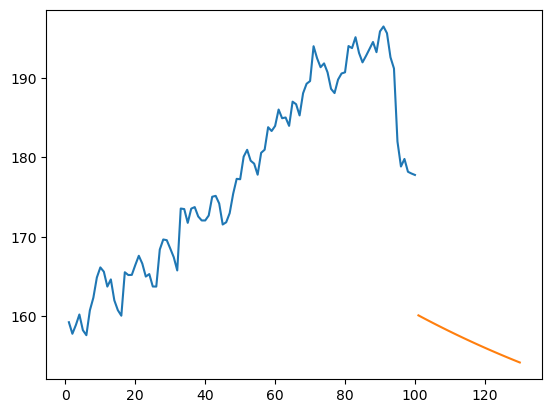

In [72]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

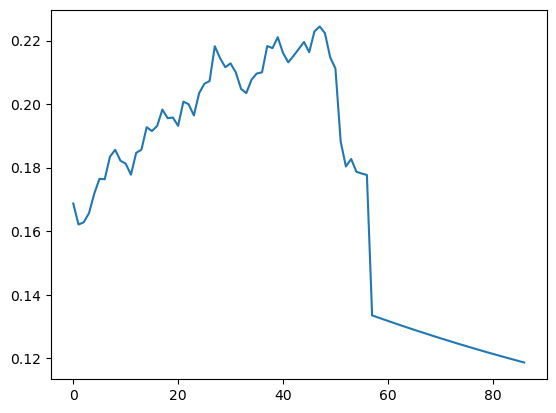

In [74]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])